In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
target = 'Attrition'
(df[target].value_counts() / len(df)).round(2)

No     0.84
Yes    0.16
Name: Attrition, dtype: float64

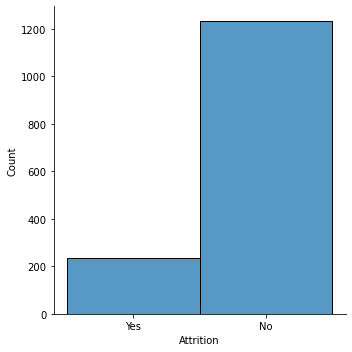

In [6]:
sns.displot(data=df, x=target)

## Анализ признаков

### Анализ кол-ва уникальных значений признаков, удаление неинформативных

In [7]:
features = df.drop(target, axis=1).columns.to_list()

uniques = []
for f in features:
    item = {'feature':f}
    count = len(df[f].unique())
    item['unique'] = count
    if count < 10:
        item['values'] = df[f].unique().tolist()
    elif count < df.shape[0]:
        item['values'] = df[f].unique().tolist()[:10] + ['...']
    else:
        item['values'] = ['All values are unique']
    uniques.append(item)
df_uniques = pd.DataFrame(uniques).sort_values(by = 'unique', ascending=False)
df_uniques = df_uniques.set_index('feature')

df_uniques.style.background_gradient(subset=['unique'], cmap='Reds')

,unique,values
feature,,
EmployeeNumber,1470,['All values are unique']
MonthlyRate,1427,"[19479, 24907, 2396, 23159, 16632, 11864, 9964, 13335, 8787, 16577, '...']"
MonthlyIncome,1349,"[5993, 5130, 2090, 2909, 3468, 3068, 2670, 2693, 9526, 5237, '...']"
DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358, 216, 1299, '...']"
HourlyRate,71,"[94, 61, 92, 56, 40, 79, 81, 67, 44, 84, '...']"
Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, '...']"
TotalWorkingYears,40,"[8, 10, 7, 6, 12, 1, 17, 5, 3, 31, '...']"
YearsAtCompany,37,"[6, 10, 0, 8, 2, 7, 1, 9, 5, 4, '...']"
DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, '...']"


In [8]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
features = df.drop(target, axis=1).columns.to_list()
features

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Анализ числовых и категориальных переменных

In [11]:
# Выделение числовых и категориальных переменных

numerical_feat = [col for col in df.select_dtypes('int64').columns if col in features]
categorical_feat = [col for col in df.select_dtypes('object').columns if col in features]

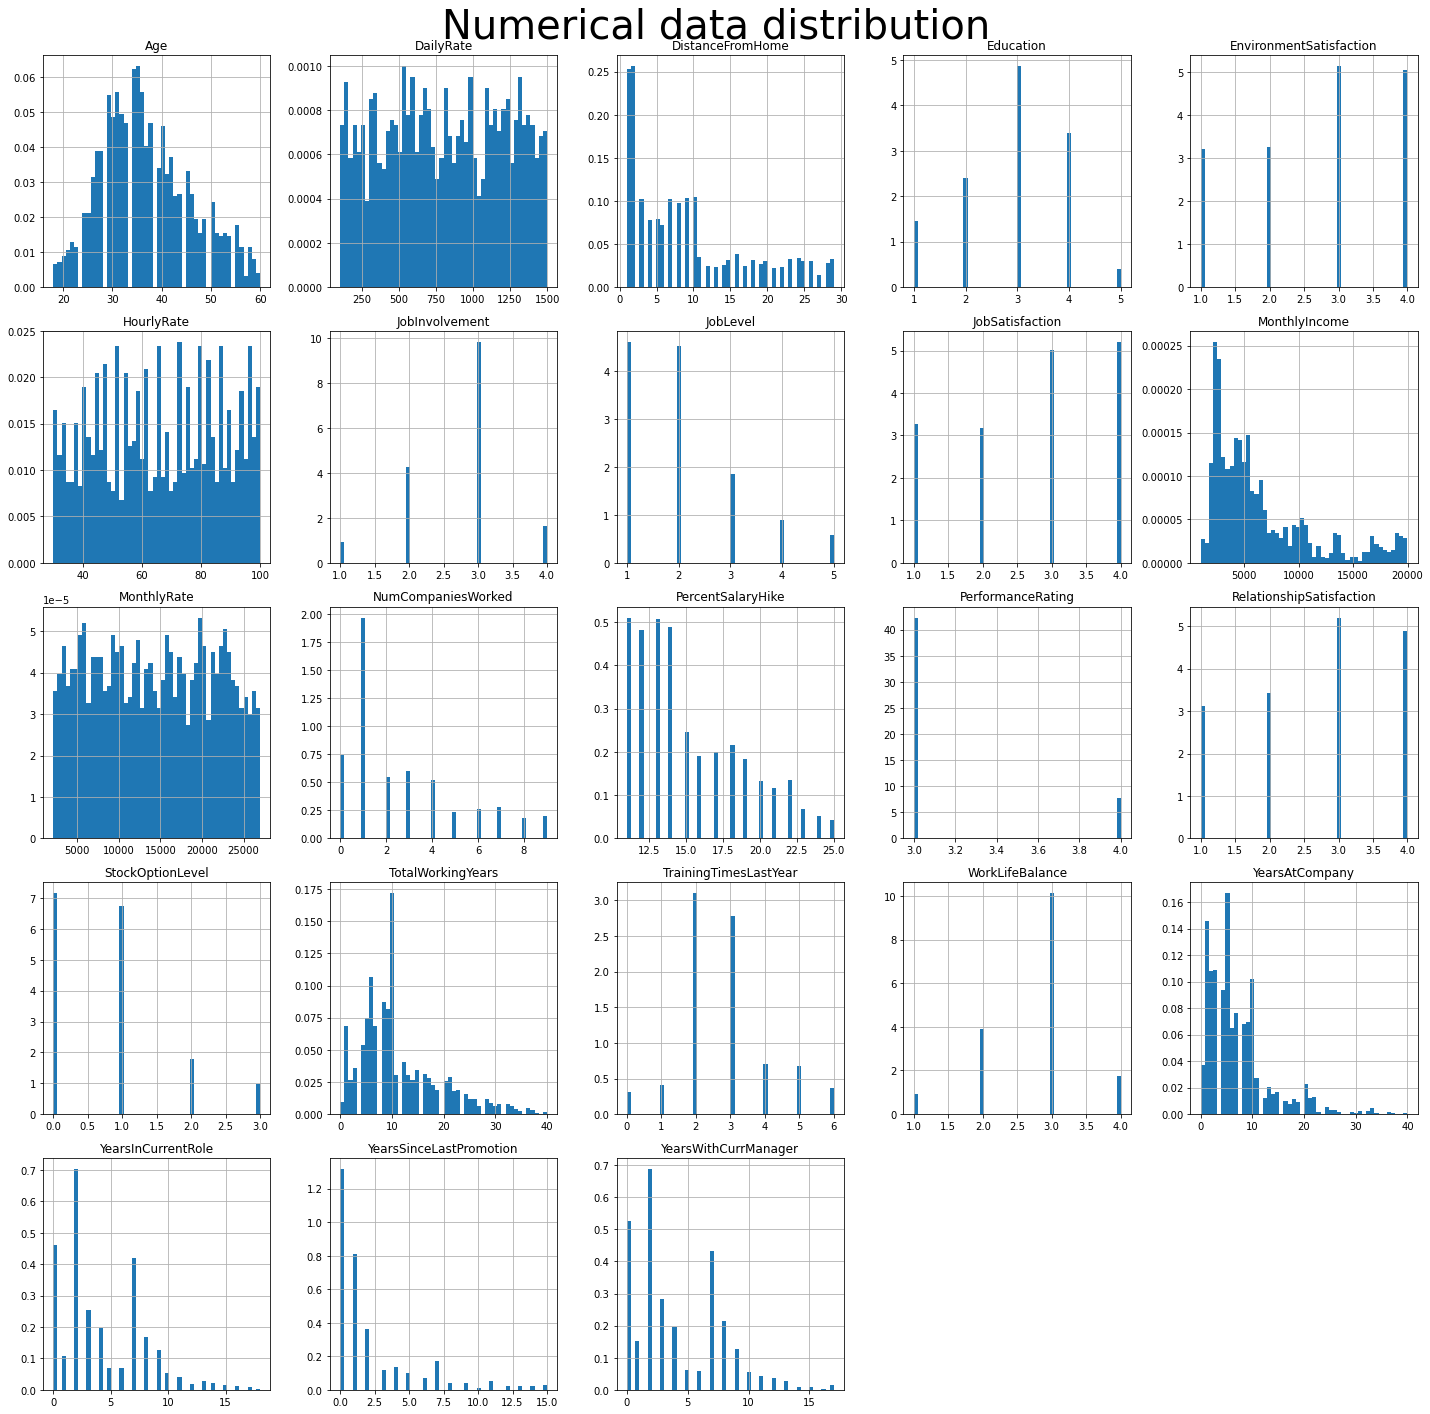

In [12]:
df[numerical_feat].hist(figsize=(20, 20), density=True, bins=50)
plt.suptitle('Numerical data distribution', fontsize=40)
plt.tight_layout()
plt.show()

23


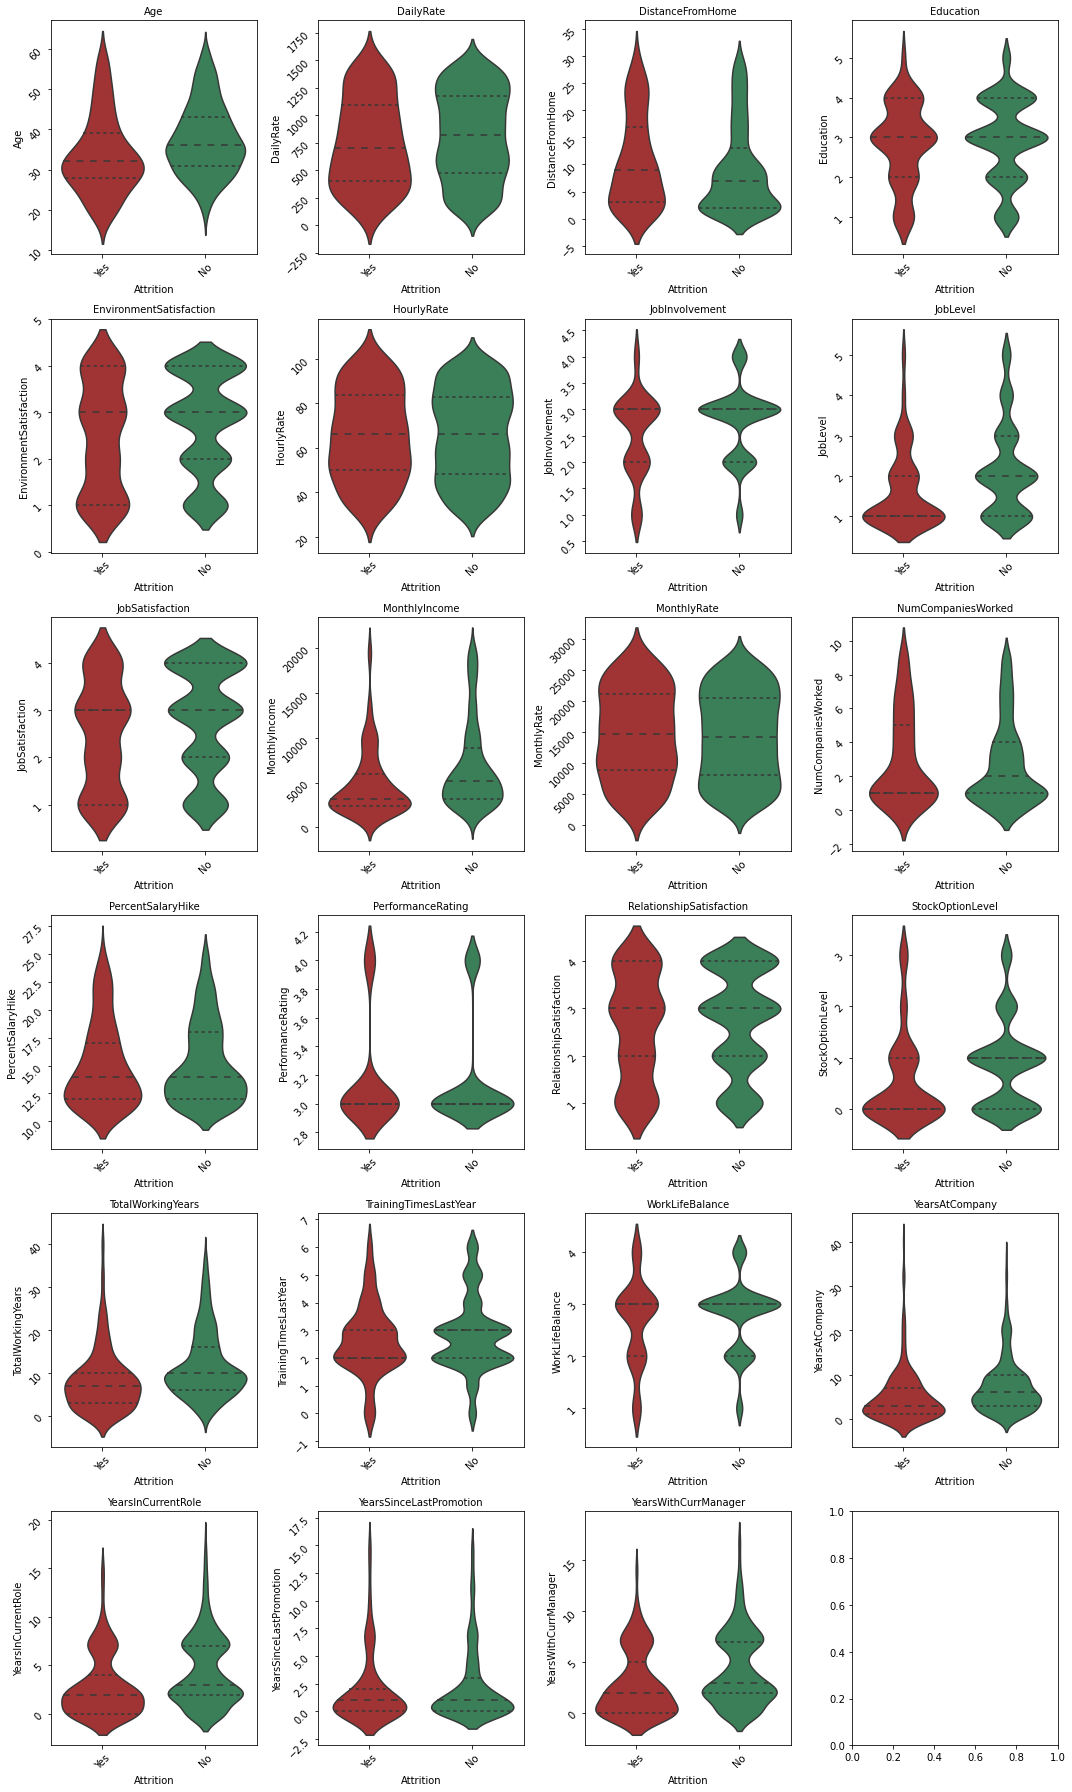

In [16]:
my_palette = {'Yes': 'firebrick', 'No': 'seagreen'}
print(len(numerical_feat))
fig , ax = plt.subplots(6, 4, figsize=(15, 25))
total = len(df)
ax =  np.ravel(ax)

for i, col in enumerate(numerical_feat):
    sns.violinplot(ax=ax[i], y=df[col], x=df['Attrition'], inner='quartile', palette=my_palette)
    ax[i].tick_params(labelrotation=45)
    ax[i].set_title(f"{col}", fontsize=10)
    ax[i].set(xlabel='Attrition')
  
fig.tight_layout()
plt.show()

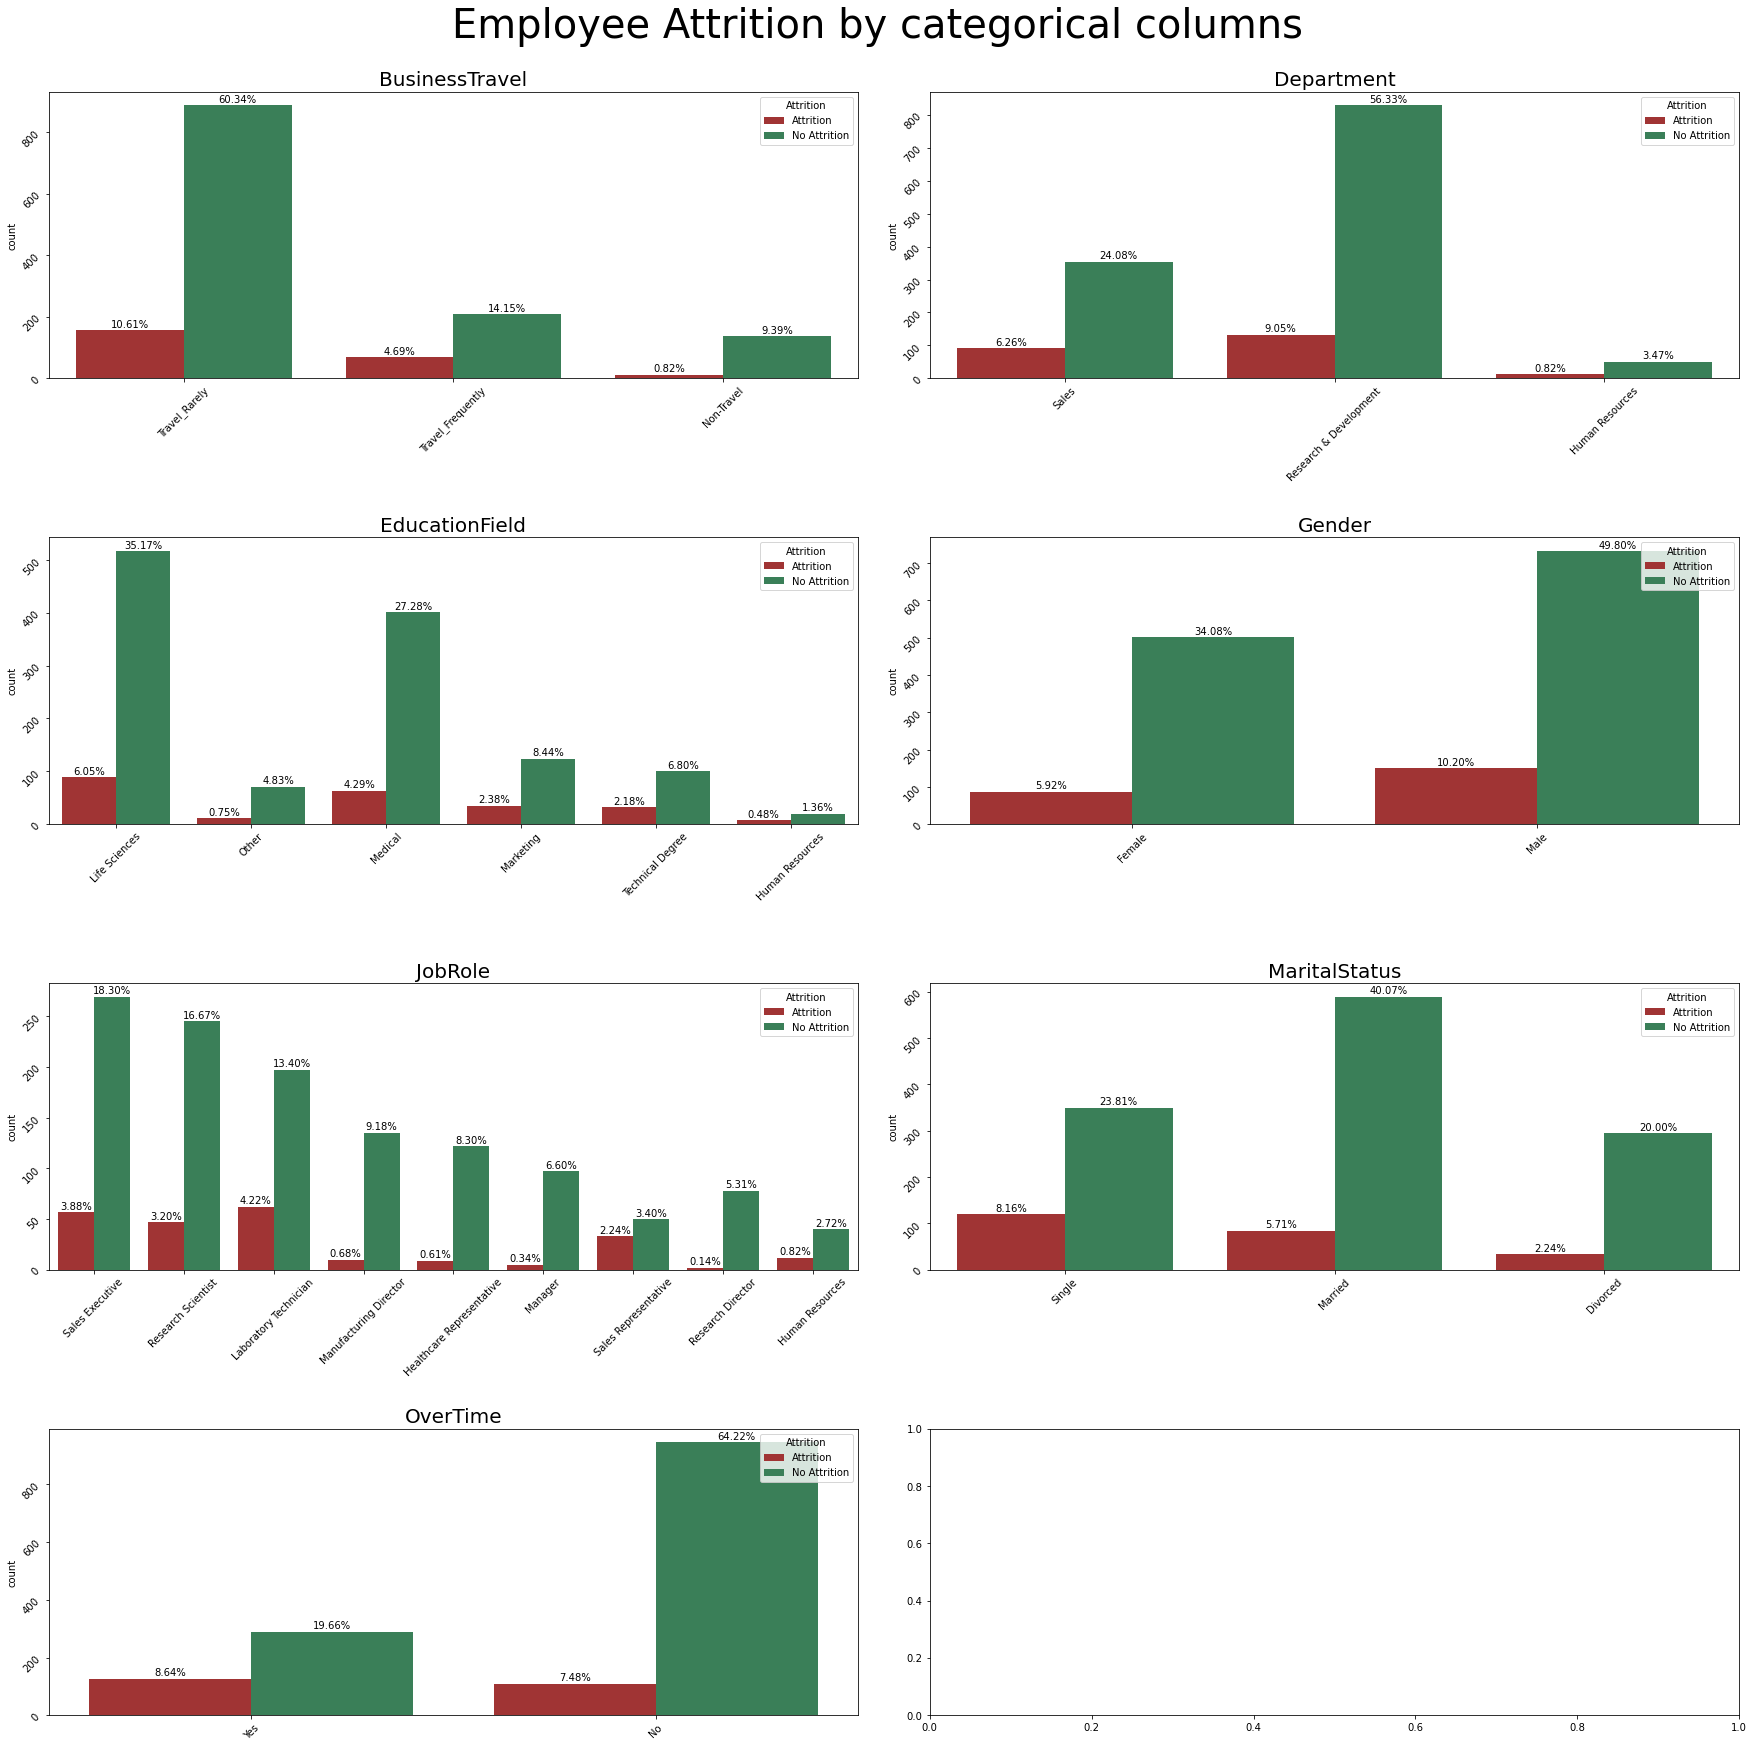

In [17]:
fig , ax = plt.subplots(4,2,figsize=(25,25))
total = len(df)
ax =  np.ravel(ax)

for i, col in enumerate(categorical_feat):
    sns.countplot(ax=ax[i], x=df[col], hue=df['Attrition'], palette=my_palette)
    ax[i].tick_params(labelrotation=45)
    ax[i].set_title(f"{col}",fontsize=20)
    ax[i].legend(title='Attrition', loc='upper right', labels=['Attrition', 'No Attrition'])
    ax[i].set(xlabel=None)
  
    for p in ax[i].patches:
        percentage = f'{100*p.get_height()/total:.2f}%\n'
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax[i].annotate(percentage, (x,y), ha='center', va='center')


fig.suptitle("Employee Attrition by categorical columns",fontsize = 40)
fig.tight_layout(pad = 3)
plt.show()

### Добавление новых признаков

In [17]:
df['MonthlyIncome/Age'] = df['MonthlyIncome'] / df['Age']

df["Age_risk"] = (df["Age"] < 34).astype(int)
df["DailyRate_risk"] = (df["DailyRate"] < 700).astype(int)  # changed from HourlyRate
df["Distance_risk"] = (df["DistanceFromHome"] >= 20).astype(int)
df["YearsAtCo_risk"] = (df["YearsAtCompany"] < 4).astype(int)

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].replace(0, 1)
df['AverageTenure'] = df["TotalWorkingYears"] / df["NumCompaniesWorked"]

df['JobHopper'] = ((df["NumCompaniesWorked"] > 2) & (df["AverageTenure"] < 2.0)).astype(int)

df["AttritionRisk"] = df["Age_risk"] + df["DailyRate_risk"] + df["Distance_risk"] + df["YearsAtCo_risk"] + df['JobHopper']

In [11]:
categorical_feat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [18]:
df[categorical_feat].head(3)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


### Обработка категориальных признаков

In [19]:
def fill_jobrole(x):
    res = [0 for i in range(9)]
    dict = {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, \
            'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, \
                'Research Director': 7, 'Human Resources': 8}
    res[dict[x['JobRole']]] = 1
    return pd.Series(res)

df[['JobRole_sales_exef', 'JobRole_res_sc', 'JobRole_lab_tech', 'JobRole_man_dir', \
    'JobRole_health', 'JobRole_manager', 'JobRole_sales_rep', 'JobRole_res_dir', 'JobRole_hum_resb']] = df.apply(lambda x : fill_jobrole(x), axis = 1)
df[['JobRole', 'JobRole_sales_exef', 'JobRole_res_sc', 'JobRole_lab_tech', 'JobRole_man_dir', \
    'JobRole_health', 'JobRole_manager', 'JobRole_sales_rep', 'JobRole_res_dir', 'JobRole_hum_resb']].head(2)

,JobRole,JobRole_sales_exef,JobRole_res_sc,JobRole_lab_tech,JobRole_man_dir,JobRole_health,JobRole_manager,JobRole_sales_rep,JobRole_res_dir,JobRole_hum_resb
0,Sales Executive,1,0,0,0,0,0,0,0,0
1,Research Scientist,0,1,0,0,0,0,0,0,0


In [20]:
def fill_marrst(x):
    res = [0, 0, 0]
    dict = {'Single': 0, 'Married': 1, 'Divorced': 2}
    res[dict[x['MaritalStatus']]] = 1
    return pd.Series(res)

df[['MaritalStatus_sing', 'MaritalStatus_marr', 'MaritalStatus_divorce']] = df.apply(lambda x : fill_marrst(x), axis = 1)
df[['MaritalStatus', 'MaritalStatus_sing', 'MaritalStatus_marr', 'MaritalStatus_divorce']].head(2)

,MaritalStatus,MaritalStatus_sing,MaritalStatus_marr,MaritalStatus_divorce
0,Single,1,0,0
1,Married,0,1,0


In [21]:
def fill_gender(x):
    res = [0, 0]
    dict = {'Female': 0, 'Male': 1}
    res[dict[x['Gender']]] = 1
    return pd.Series(res)

df[['Gender_fem', 'Gender_male']] = df.apply(lambda x : fill_gender(x), axis = 1)
df[['Gender', 'Gender_fem', 'Gender_male']].head(2)

,Gender,Gender_fem,Gender_male
0,Female,1,0
1,Male,0,1


In [22]:
def fill_educ(x):
    res = [0, 0, 0, 0, 0, 0]
    dict = {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}
    res[dict[x['EducationField']]] = 1
    return pd.Series(res)

df[['Educ_lifesc', 'Educ_other', 'Educ_medic', 'Educ_market', 'Educ_tech', 'Educ_hum_res']] = df.apply(lambda x : fill_educ(x), axis = 1)
df[['EducationField', 'Educ_lifesc', 'Educ_other', 'Educ_medic', 'Educ_market', 'Educ_tech', 'Educ_hum_res']].head(2)

,EducationField,Educ_lifesc,Educ_other,Educ_medic,Educ_market,Educ_tech,Educ_hum_res
0,Life Sciences,1,0,0,0,0,0
1,Life Sciences,1,0,0,0,0,0


In [23]:
def fill_dep(x):
    res = [0, 0, 0, 0]
    dict = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2, 'Other': 3}
    res[dict[x['Department']]] = 1
    return pd.Series(res)

df[['Dep_sales', 'Dep_research_dev', 'Dep_hum_res', 'Dep_other']] = df.apply(lambda x : fill_dep(x), axis = 1)
df[['Department', 'Dep_sales', 'Dep_research_dev', 'Dep_hum_res', 'Dep_other']].head(2)

,Department,Dep_sales,Dep_research_dev,Dep_hum_res,Dep_other
0,Sales,1,0,0,0
1,Research & Development,0,1,0,0


In [24]:
df.drop(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis=1, inplace=True)

In [25]:
# BusinessTravel
maplist = [{'col': 'BusinessTravel', 'mapping': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}}]
oe = OrdinalEncoder(mapping=maplist)
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'])

# OverTime
maplist = [{'col': 'OverTime', 'mapping': {'No': 0, 'Yes': 1}}]
oe = OrdinalEncoder(mapping=maplist)
df['OverTime'] = oe.fit_transform(df['OverTime'])

# Attrition
maplist = [{'col': 'Attrition', 'mapping': {'No': 0, 'Yes': 1}}]
oe = OrdinalEncoder(mapping=maplist)
df['Attrition'] = oe.fit_transform(df['Attrition'])

In [26]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Educ_lifesc,Educ_other,Educ_medic,Educ_market,Educ_tech,Educ_hum_res,Dep_sales,Dep_research_dev,Dep_hum_res,Dep_other
0,41,1,1,1102,1,2,2,94,3,2,...,1,0,0,0,0,0,1,0,0,0
1,49,0,2,279,8,1,3,61,2,2,...,1,0,0,0,0,0,0,1,0,0


### Корреляция признаков

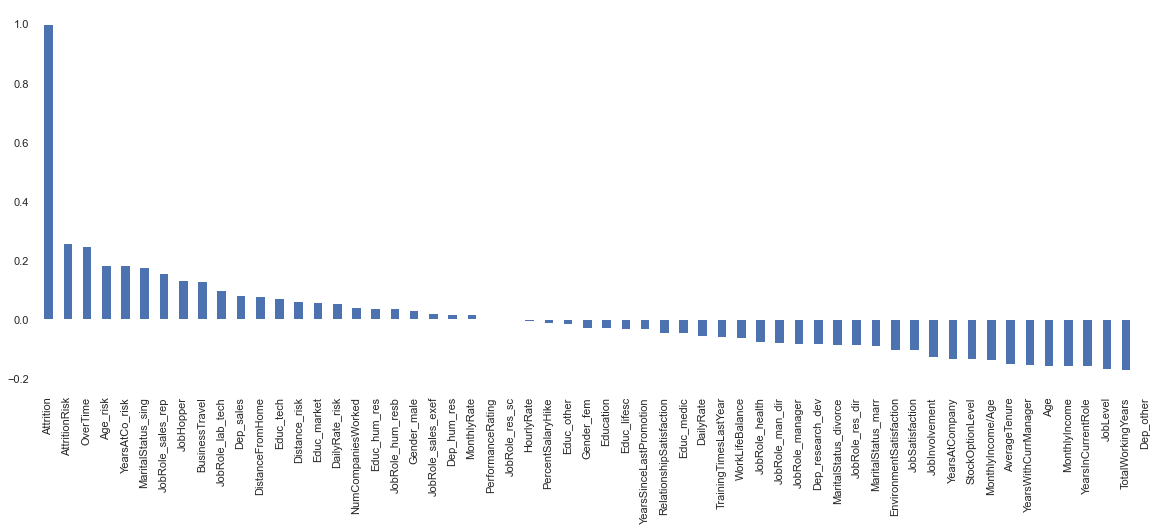

In [28]:
# Корреляция признаков
correlations=df.corr()
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
plt.figure(figsize=(20,7))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [21]:
threshold=0.7
cols = list(correlations.columns)
cols_at_index = list(correlations.index)
feature1, feature2, correlation = [], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j] >= threshold and correlations[cols[i]][j] < 1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])

new_df = pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,DistanceFromHome,Distance_risk,0.812433
1,JobLevel,MonthlyIncome,0.950300
2,JobLevel,TotalWorkingYears,0.782208
3,JobLevel,MonthlyIncome/Age,0.877710
4,MonthlyIncome,TotalWorkingYears,0.772893
5,MonthlyIncome,MonthlyIncome/Age,0.932472
6,PercentSalaryHike,PerformanceRating,0.773550
7,YearsAtCompany,YearsInCurrentRole,0.758754
8,YearsAtCompany,YearsWithCurrManager,0.769212
9,YearsAtCompany,AverageTenure,0.777699


In [29]:
df_copy = df.copy()

df_copy.drop(['MonthlyRate', 'PerformanceRating',  'HourlyRate', 'PercentSalaryHike'], axis=1, inplace=True)
df_copy.drop(['YearsInCurrentRole', 'YearsWithCurrManager'], axis=1, inplace=True)
df_copy.drop(['DailyRate', 'JobLevel', 'DailyRate_risk'], axis=1, inplace=True)

In [30]:
df_copy.head(2)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,Educ_lifesc,Educ_other,Educ_medic,Educ_market,Educ_tech,Educ_hum_res,Dep_sales,Dep_research_dev,Dep_hum_res,Dep_other
0,41,1,1,1,2,2,3,4,5993,8,...,1,0,0,0,0,0,1,0,0,0
1,49,0,2,8,1,3,2,2,5130,1,...,1,0,0,0,0,0,0,1,0,0


## Выбор модели

In [31]:
y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)

In [32]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

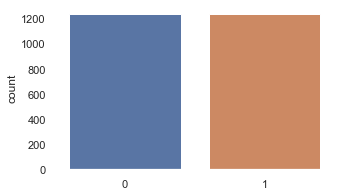

In [33]:
plt.subplots(figsize=(5,3))
sns.countplot(x=y);

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [36]:
%%time
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=13)
results = {'model': [], 'f1': []}
for classifier in [BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(),
                RandomForestClassifier(), HistGradientBoostingClassifier(), AdaBoostClassifier(),
                LogisticRegression(solver='liblinear'), RidgeClassifier()]:
    model = classifier
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring="f1")
    results['model'].append(model.__class__.__name__)
    results['f1'].append(np.mean(cv_results))
display(pd.DataFrame(results).sort_values('f1', ascending=False))

,model,f1
2,GradientBoostingClassifier,0.910329
4,HistGradientBoostingClassifier,0.907610
1,ExtraTreesClassifier,0.906430
3,RandomForestClassifier,0.893308
5,AdaBoostClassifier,0.887436
0,BaggingClassifier,0.876687
7,RidgeClassifier,0.845549
6,LogisticRegression,0.843883


Wall time: 25 s


In [37]:
%%time
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=13)
results = {'model': [], 'accuracy': []}
for classifier in [BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(),
                RandomForestClassifier(), HistGradientBoostingClassifier(), AdaBoostClassifier(),
                LogisticRegression(solver='liblinear'), RidgeClassifier()]:
    model = classifier
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
    results['model'].append(model.__class__.__name__)
    results['accuracy'].append(np.mean(cv_results))
display(pd.DataFrame(results).sort_values('accuracy', ascending=False))

,model,accuracy
1,ExtraTreesClassifier,0.921355
2,GradientBoostingClassifier,0.914871
4,HistGradientBoostingClassifier,0.911623
3,RandomForestClassifier,0.901066
5,AdaBoostClassifier,0.889739
0,BaggingClassifier,0.872670
7,RidgeClassifier,0.849140
6,LogisticRegression,0.845919


Wall time: 24.7 s


In [37]:
%%time
# hyperparameter tuning

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# сетка для GradientBoostingClassifier
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [20, 50, 100],
    'max_leaf_nodes': [15, 31, 63, 127],
}

gbc = GradientBoostingClassifier()

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean cross-validation score: {abs(grid_search.best_score_)}")

{'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 31, 'min_samples_leaf': 20}

Best mean cross-validation score: 0.9124123629900266

## Обучение модели

In [36]:
import sklearn.metrics
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_leaf_nodes=31, min_samples_leaf=20)

gbc.fit(X_train, y_train)

print(f'Accuracy score: {gbc.score(X_test, y_test):.4f}')

Accuracy score: 0.9181


In [37]:
y_pred = gbc.predict(X_test)
y_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [38]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,1,1,0
1,1,0,1
2,1,1,0
3,1,1,0
4,1,1,0


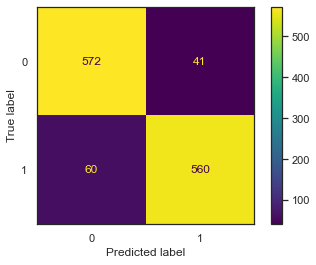

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

sns.set_style('white')
ConfusionMatrixDisplay.from_predictions(y_test, gbc.predict(X_test));


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       613
           1       0.93      0.90      0.92       620

    accuracy                           0.92      1233
   macro avg       0.92      0.92      0.92      1233
weighted avg       0.92      0.92      0.92      1233



## Сохранение модели

In [98]:
import pickle
pickle.dump(gbc, open('model_gbc.pkl', 'wb'))